# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/SkillBox/Fishing.csv')

In [ ]:
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [ ]:
dat['income_log'] = dat['income'].apply(np.log)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,income_log
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [ ]:
dat['pdiff'] = dat.loc[:,('price','pbeach')].apply(lambda x: abs(x[0] - x[1]), axis=1)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,income_log,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [ ]:
dat.groupby('mode')['price'].agg('mean')

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [ ]:
dat.groupby('mode')['price'].agg('median') - dat.groupby('mode')['price'].agg('mean')

mode
beach     -16.391493
boat      -17.004813
charter   -18.226942
pier      -13.942326
Name: price, dtype: float64

In [ ]:
dat.groupby('mode')['price'].agg(lambda x: x.median() - x.mean())

mode
beach     -16.391493
boat      -17.004813
charter   -18.226942
pier      -13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [ ]:
for name, data in dat.groupby("mode"):
    print(name, data) 

beach       Unnamed: 0  Unnamed: 0.1   mode  ...      income  income_log  pdiff
6              6             7  beach  ...  8750.00100    9.076809    0.0
14            14            15  beach  ...  8750.00100    9.076809    0.0
16            16            17  beach  ...  5416.66670    8.597236    0.0
25            25            26  beach  ...  1249.99980    7.130899    0.0
33            33            34  beach  ...  3749.99990    8.229511    0.0
...          ...           ...    ...  ...         ...         ...    ...
1167        1167          1168  beach  ...  2083.33320    7.641724    0.0
1173        1173          1174  beach  ...  2916.66660    7.978197    0.0
1176        1176          1177  beach  ...  2916.66660    7.978197    0.0
1178        1178          1179  beach  ...  6250.00130    8.740337    0.0
1180        1180          1181  beach  ...   416.66668    6.032287    0.0

[134 rows x 16 columns]
boat       Unnamed: 0  Unnamed: 0.1  mode  ...      income  income_log    pdiff
2

**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [ ]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [ ]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [ ]:
for name, data in dat.groupby("mode"):
    data.to_csv(f'/content/drive/MyDrive/SkillBox/mode_{name}.csv')

### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [ ]:
dat.sort_values('income', inplace=True)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,income_log,pdiff
771,771,772,pier,3.870,0.1498,3.870,3.870,12.900,31.400,0.2537,0.1498,0.2339,0.6288,416.66668,6.032287,0.000
890,890,891,boat,3.870,0.6817,22.446,22.446,3.870,28.870,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,18.576
828,828,829,pier,3.870,0.0014,3.870,3.870,16.770,35.270,0.2537,0.0014,0.0626,0.2773,416.66668,6.032287,0.000
981,981,982,pier,2.322,0.4522,2.322,2.322,55.470,90.470,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
199,199,200,charter,50.398,0.1176,22.704,22.704,20.898,50.398,0.0678,0.0503,0.0016,0.1176,416.66668,6.032287,27.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,666,667,beach,47.370,0.2537,47.370,47.370,157.900,176.400,0.2537,0.1498,0.0233,0.0219,12499.99800,9.433484,0.000
634,634,635,boat,37.896,0.0156,581.072,581.072,37.896,72.896,0.5333,0.4522,0.0156,0.0058,12499.99800,9.433484,543.176
668,668,669,boat,47.370,0.0102,252.640,252.640,47.370,82.370,0.0678,0.0789,0.0102,0.0209,12499.99800,9.433484,205.270
1085,1085,1086,boat,37.896,0.7369,227.376,227.376,37.896,62.896,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,189.480


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [ ]:
dat.sort_values(['income', 'price'])

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,income_log,pdiff
1105,1105,1106,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.000
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1013,1013,1014,beach,1.290,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
981,981,982,pier,2.322,0.4522,2.322,2.322,55.470,90.470,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
985,985,986,pier,3.096,0.4522,3.096,3.096,43.860,78.860,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,216,217,beach,120.004,0.0678,120.004,120.004,252.640,281.640,0.0678,0.0789,0.1643,0.5391,12499.99800,9.433484,0.000
222,222,223,boat,180.006,0.1574,255.798,255.798,180.006,204.006,0.1049,0.0451,0.1574,0.4671,12499.99800,9.433484,75.792
135,135,136,boat,205.270,0.0156,375.802,375.802,205.270,240.270,0.5333,0.4522,0.0156,0.0058,12499.99800,9.433484,170.532
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.99800,9.433484,73.212


In [ ]:
list(dat.sort_values(['income', 'price']).groupby('mode')['price'])

[('beach', 1013      1.290
  892       3.870
  603       5.934
  978       7.998
  1180     36.636
           ...   
  817      36.870
  278      13.290
  580      37.896
  666      47.370
  216     120.004
  Name: price, Length: 134, dtype: float64), ('boat', 1002      3.096
  890       3.870
  878       3.870
  868       3.870
  850       3.870
           ...   
  129      94.740
  121      94.740
  222     180.006
  135     205.270
  377     328.432
  Name: price, Length: 418, dtype: float64), ('charter', 989      28.096
  882      28.870
  215      40.934
  141      45.062
  517      48.674
           ...   
  643      66.896
  536     241.640
  661     247.640
  1145     40.790
  524     240.586
  Name: price, Length: 452, dtype: float64), ('pier', 1105      1.290
  1157      1.290
  981       2.322
  985       3.096
  771       3.870
           ...   
  977      76.198
  327      13.290
  687      47.370
  89      104.214
  36      120.004
  Name: price, Length: 178, dtype: float

In [ ]:
list( dat.sort_values(['income', 'price']).groupby('mode')['income'])

[('beach', 1013      416.66668
  892       416.66668
  603       416.66668
  978       416.66668
  1180      416.66668
             ...     
  817      9583.33570
  278     10416.66600
  580     12499.99800
  666     12499.99800
  216     12499.99800
  Name: income, Length: 134, dtype: float64), ('boat', 1002      416.66668
  890       416.66668
  878       416.66668
  868       416.66668
  850       416.66668
             ...     
  129     12499.99800
  121     12499.99800
  222     12499.99800
  135     12499.99800
  377     12499.99800
  Name: income, Length: 418, dtype: float64), ('charter', 989       416.66668
  882       416.66668
  215       416.66668
  141       416.66668
  517       416.66668
             ...     
  643     10416.66600
  536     10416.66600
  661     10416.66600
  1145    12499.99800
  524     12499.99800
  Name: income, Length: 452, dtype: float64), ('pier', 1105      416.66668
  1157      416.66668
  981       416.66668
  985       416.66668
  771       416

Нет, нельзя сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой. В каждом виде рыбалки присутствуют люди, как с высоким доходом, так и с низким.

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [ ]:
dat.isna().sum() # в датафрейме отсутствуют NaN значения

Unnamed: 0      0
Unnamed: 0.1    0
mode            0
price           0
catch           0
pbeach          0
ppier           0
pboat           0
pcharter        0
cbeach          0
cpier           0
cboat           0
ccharter        0
income          0
income_log      0
pdiff           0
dtype: int64

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [ ]:
gov_ind = pd.read_csv('/content/drive/MyDrive/SkillBox/wgi_fh.csv', sep=';', decimal=',')
gov_ind

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN
...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
210,South Africa,ZAF,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
211,"Congo, Dem. Rep.",ZAR,2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0
212,Zambia,ZMB,2016,-0.30,0.18,-0.66,-0.48,-0.30,-0.40,3.5


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [ ]:
gov_ind.info()
# столбцов 10, строк 214, типы данных: object, int, float, есть 50 NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [ ]:
gov_ind.dropna(inplace=True)
gov_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   195 non-null    object 
 1   cnt_code  195 non-null    object 
 2   year      195 non-null    int64  
 3   va        195 non-null    float64
 4   ps        195 non-null    float64
 5   ge        195 non-null    float64
 6   rq        195 non-null    float64
 7   rl        195 non-null    float64
 8   cc        195 non-null    float64
 9   fh        195 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [ ]:
gov_ind.index = gov_ind['cnt_code']
gov_ind.drop(['cnt_code']
gov_ind.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [ ]:
gov_ind.sort_values(['cc', 'va'], inplace=True)
gov_ind.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [ ]:
gov_ind['cc_round'] = gov_ind['cc'].apply(lambda x: np.around(x, 1))
gov_ind.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [ ]:
def fr_stat(fh_index):
    if 1 <= fh_index <= 2.5:
         return 'Free'
    elif 3 <= fh_index <= 5:
        return 'Partly free'
    elif 5.5 <= fh_index <= 7:
        return 'Not free'

In [ ]:
gov_ind['fh_status'] = gov_ind['fh'].apply(fr_stat)
gov_ind.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [ ]:
list(gov_ind.groupby('fh_status'))
print('Political Stability and Lack of Violence')
gov_ind.groupby('fh_status')['ps'].agg(['min', 'mean', 'max'])

Political Stability and Lack of Violence


,min,mean,max
fh_status,,,
Free,-0.99,0.619059,1.49
Not free,-2.91,-0.875800,1.26
Partly free,-2.47,-0.424000,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [ ]:
for name, data in gov_ind.groupby('fh_status'):
    data.to_csv(f'/content/drive/MyDrive/SkillBox/fh_status_{name}.csv')

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [ ]:
fh_count = gov_ind.groupby('fh_status')['fh'].agg('count')
fh_count

fh_status
Free           85
Not free       50
Partly free    60
Name: fh, dtype: int64

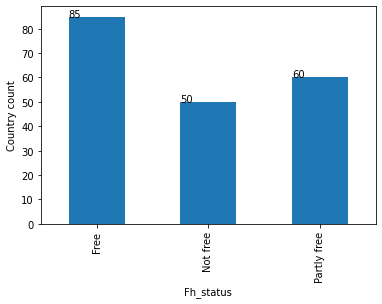

In [ ]:
%matplotlib inline
ax = fh_count.plot.bar()
ax.set_xlabel("Fh_status")
ax.set_ylabel("Country count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))